In [1]:
import json
import warnings
import numpy as np
import pandas as pd
from modules.bootstrap import *
import matplotlib.pyplot as plt
from modules.minisom import MiniSom
from sklearn.preprocessing import MinMaxScaler

# ignore warnings
warnings.filterwarnings("ignore")

In [2]:
# load the data
path = "C:\\Users\\Samsung\\OneDrive\\Ícaro Augusto\\Portfolio\\deeplearning_chemicalengineering\\0_data\\som_studies\\data_rotaA.csv"
data = pd.read_csv(path, index_col=[0])

In [3]:
# define the columns that will be used in the SOM
x_cols = ['x_glic_et', 'x_cell_glic', 'eta_cell_orgsolv', 'capex_f1_A',
          'raw_mat_price', 'enzyme_load', 'lign_price', 'et_price']

# define the target column
target = 'vpl'

# sample x and y
x = data[x_cols]
y = data[[target]]

In [4]:
# scale the features and fit SOM
scaler = MinMaxScaler(feature_range=(0, 1))
scaler.fit(x)

x_sc = scaler.transform(x)

# determine the grid size
N = int(np.sqrt(5 * np.sqrt(x_sc.shape[0]))) 
print(f'Map Size: {N}')

Map Size: 18


In [5]:
# fit a SOM with the best influence radius (n=1)
som = MiniSom(x=N, y=N, input_len=x_sc.shape[1], sigma=1, learning_rate=0.5)
som.random_weights_init(x_sc)
som.train_random(x_sc, num_iteration=200)

In [6]:
# get the distance map
dists = som.distance_map()

In [7]:
# get winning neurons for each sample
dist_list = []
winning = []
for i in range(x_sc.shape[0]):

    # get winning neuron coordinates
    coord = som.winner(x=x_sc[i])
    winning.append(coord)

    # get distance
    dist_list.append(dists[coord])

# add the winning neurons to the data
x_data = pd.DataFrame(scaler.inverse_transform(x_sc), columns=x_cols)
x_data['winning'] = winning
x_data['dist'] = dist_list

# append the target column
x_data[target] = y

In [8]:
x_data.sort_values(by='dist', inplace=True)
x_data.head()

,x_glic_et,x_cell_glic,eta_cell_orgsolv,capex_f1_A,raw_mat_price,enzyme_load,lign_price,et_price,winning,dist,vpl
101,0.943855,0.749152,0.864794,227.661464,74.015318,0.008292,896.741042,0.462413,"(17, 17)",0.195738,622.716631
4841,0.915066,0.738099,0.832960,228.311136,81.071535,0.009507,950.287931,0.500503,"(17, 17)",0.195738,648.213091
943,0.925652,0.700109,0.816078,264.796507,74.396487,0.007966,1011.952776,0.508852,"(17, 17)",0.195738,714.870117
2749,0.926089,0.696063,0.858755,226.950077,77.553433,0.008969,880.665390,0.610215,"(17, 17)",0.195738,583.991684
2736,0.936348,0.728717,0.830954,223.692767,74.209378,0.010309,852.988316,0.481711,"(17, 17)",0.195738,626.391951


In [9]:
x_data.tail()

,x_glic_et,x_cell_glic,eta_cell_orgsolv,capex_f1_A,raw_mat_price,enzyme_load,lign_price,et_price,winning,dist,vpl
3759,0.927699,0.719098,0.894798,198.922445,74.720883,0.008602,1064.603697,0.462781,"(3, 10)",1.0,558.552682
4153,0.939569,0.712481,0.943333,184.216848,74.571001,0.008489,1054.944448,0.522931,"(3, 10)",1.0,477.772526
564,0.919187,0.702391,0.881479,191.360826,79.121592,0.008618,941.991272,0.517884,"(3, 10)",1.0,533.043322
2854,0.910440,0.702093,0.908636,169.232250,72.107945,0.006613,1042.166893,0.601517,"(3, 10)",1.0,403.315145
2818,0.954089,0.691380,0.906915,162.143138,76.254886,0.008480,1020.385149,0.502025,"(3, 10)",1.0,445.536359


- VPL does not have any evident variation between the farthest neurons when compared to the more common neurons. Let's check the correlation.

In [10]:
# checking correlation matrix
x_data.drop(columns='winning').corr(method='spearman')

,x_glic_et,x_cell_glic,eta_cell_orgsolv,capex_f1_A,raw_mat_price,enzyme_load,lign_price,et_price,dist,vpl
x_glic_et,1.000000,0.024912,-0.011844,-0.013577,-0.008301,-0.012894,0.014164,-0.027326,0.010221,-0.060129
x_cell_glic,0.024912,1.000000,0.024135,0.008034,-0.013179,-0.003830,-0.008200,-0.011149,0.075630,-0.132970
eta_cell_orgsolv,-0.011844,0.024135,1.000000,0.001058,-0.016940,0.012952,0.036264,-0.008833,0.068214,-0.075720
capex_f1_A,-0.013577,0.008034,0.001058,1.000000,-0.009071,0.004549,-0.001599,-0.009303,-0.005833,0.860119
raw_mat_price,-0.008301,-0.013179,-0.016940,-0.009071,1.000000,-0.023596,-0.005059,-0.003629,0.070466,0.145522
enzyme_load,-0.012894,-0.003830,0.012952,0.004549,-0.023596,1.000000,-0.021621,-0.007685,0.002176,0.164091
lign_price,0.014164,-0.008200,0.036264,-0.001599,-0.005059,-0.021621,1.000000,-0.012282,-0.003449,-0.000317
et_price,-0.027326,-0.011149,-0.008833,-0.009303,-0.003629,-0.007685,-0.012282,1.000000,-0.001952,-0.394631
dist,0.010221,0.075630,0.068214,-0.005833,0.070466,0.002176,-0.003449,-0.001952,1.000000,-0.006432
vpl,-0.060129,-0.132970,-0.075720,0.860119,0.145522,0.164091,-0.000317,-0.394631,-0.006432,1.000000


- the correlation matrix shows that the average VPL is not correlated with the average distances of the winning neurons.
- let's try to understand if the the higher VPL are located in any specific neuron

In [11]:
x_data.sort_values(by='vpl', ascending=False, inplace=True)
x_data.head()

,x_glic_et,x_cell_glic,eta_cell_orgsolv,capex_f1_A,raw_mat_price,enzyme_load,lign_price,et_price,winning,dist,vpl
397,0.915441,0.713387,0.930694,309.181931,79.875180,0.018607,879.598113,0.421493,"(7, 17)",0.520568,932.754331
4235,0.933782,0.750267,0.846408,308.629931,71.967002,0.013805,917.511290,0.336510,"(0, 15)",0.507200,922.299392
2020,0.956918,0.774866,0.860466,294.968123,71.354232,0.011656,675.326714,0.261532,"(2, 2)",0.709272,906.213516
4813,0.951044,0.694622,0.909777,298.622203,75.585694,0.014423,954.393745,0.365287,"(9, 16)",0.707290,904.126544
3047,0.947452,0.784555,0.919772,311.868353,73.021038,0.011682,732.102918,0.340238,"(8, 7)",0.627920,900.359358


In [12]:
x_data['vpl'].describe()

count    5000.000000
mean      607.122256
std        99.278034
min       282.091283
25%       536.299022
50%       600.781968
75%       673.125570
max       932.754331
Name: vpl, dtype: float64

In [14]:
# check how many samples are in each winning neuron
# for MSP lower than a certain threshold
MIN_VPL = 700
x_data[x_data['vpl'] > MIN_VPL]['winning'].value_counts().head(10)

winning
(8, 1)      27
(8, 7)      24
(8, 12)     21
(4, 0)      20
(2, 4)      19
(8, 13)     19
(17, 12)    19
(6, 8)      18
(10, 16)    18
(9, 16)     18
Name: count, dtype: int64

In [15]:
# what % of the samples are below the threshold
x_data[x_data['vpl'] > MIN_VPL].shape[0] / x_data.shape[0]

0.1844

- apparently, there are some neurons that appear more than other. Let's check their average MSP

In [18]:
# check average and std of MSP for each winning neuron that appear when MSP is lower than a certain threshold
x_data[x_data['vpl'] > MIN_VPL].groupby('winning')['vpl'].agg(['mean', 'std']).dropna().sort_values(by='mean', ascending=False)


,mean,std
winning,,
"(5, 2)",823.108199,45.754248
"(7, 17)",816.087775,56.055487
"(0, 15)",806.579320,79.160157
"(13, 16)",805.978897,55.530542
"(8, 13)",800.671506,45.408240
...,...,...
"(17, 17)",710.238396,6.550244
"(9, 14)",709.357844,2.804547
"(15, 13)",708.727585,2.141070


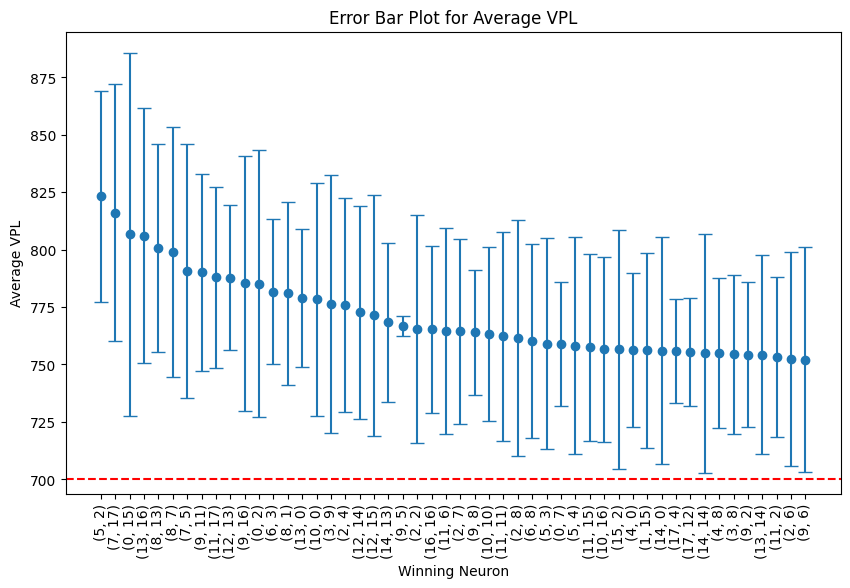

In [20]:
error = x_data[x_data['vpl'] > MIN_VPL].groupby('winning')['vpl'].agg(['mean', 'std']).dropna().sort_values(by='mean', ascending=False)

# Calculate the mean and standard deviation
mean = error['mean']
std = error['std']
xlabels = error.index
top=50

# Set the x-axis values
x = range(len(mean))

# Plot the error bar
plt.figure(figsize=(10, 6))
plt.errorbar(x[:top], mean.head(top), yerr=std.head(top), fmt='o', capsize=5)

# Add labels and title
plt.xlabel('Winning Neuron')
plt.ylabel('Average VPL')
plt.title('Error Bar Plot for Average VPL')
plt.xticks(x[:top], xlabels[:top], rotation=90)
plt.axhline(y=700, color='red', linestyle='--')

# Show the plot
plt.show()

- even if we take the top 50, the VPL is statistically higher than the target

In [21]:
# get the samples that are in the top 50 winning neurons
LIMIT_WINNING_NEURONS = 1000

def analyze_representativity(x_data, LIMIT_WINNING_NEURONS):
    top_data = x_data[x_data['winning'].isin(mean.index[:LIMIT_WINNING_NEURONS])]
    return top_data.shape[0] / x_data.shape[0]

In [22]:
fraction = []
for i in range(1, mean.shape[0]):
    fraction.append(analyze_representativity(x_data, i))

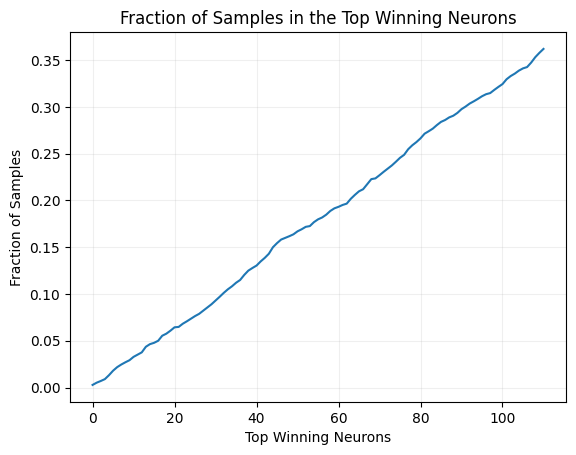

In [23]:
# plot the fraction of samples that are in the top neurons
plt.plot(fraction, '-')
plt.xlabel('Top Winning Neurons')
plt.ylabel('Fraction of Samples')
plt.title('Fraction of Samples in the Top Winning Neurons')
plt.grid(True, alpha=0.2)
plt.show()

In [24]:
# make the bootstrap analysis for the top neurons
def evaluate_risk(x_data, top_neurons, target):
    
    top_data = x_data[x_data['winning'].isin(mean.index[:top_neurons])]
    avg = bootstrap(top_data[target])
    lower, upper = np.percentile(avg, [2.5, 97.5])
    return np.mean(avg), lower, upper


risk, risk_lower, risk_upper = [], [], []
for i in range(1, mean.shape[0]):
    avg, lower, upper = evaluate_risk(x_data, i, target)
    risk.append(avg)
    risk_lower.append(lower)
    risk_upper.append(upper)

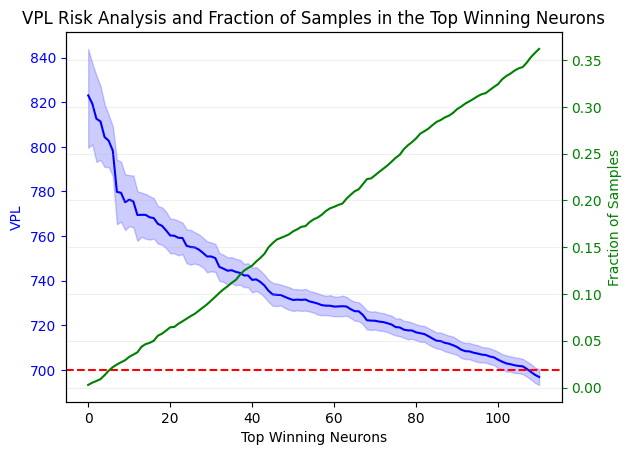

In [26]:
# plot the risk analysis and the representative fraction in second y-axis
fig, ax1 = plt.subplots()
ax1.plot(risk, 'b-')
ax1.fill_between(range(len(risk)), risk_lower, risk_upper, color='blue', alpha=0.2)
ax1.set_xlabel('Top Winning Neurons')
ax1.set_ylabel('VPL', color='b')
ax1.axhline(y=700, color='red', linestyle='--')
ax1.tick_params('y', colors='b')
second = ax1.twinx()
second.plot(fraction, 'g-')
second.set_ylabel('Fraction of Samples', color='g')
second.tick_params('y', colors='g')
plt.title('VPL Risk Analysis and Fraction of Samples in the Top Winning Neurons')
plt.grid(True, alpha=0.2)
plt.show()

In [27]:
# get the samples that are in the top 100 winning neurons
LIMIT_WINNING_NEURONS = 100
top_data = x_data[x_data['winning'].isin(mean.index[:LIMIT_WINNING_NEURONS])]

# check statistics for process variables in the top neurons
top_data.drop(columns=['winning', 'dist']).describe()

,x_glic_et,x_cell_glic,eta_cell_orgsolv,capex_f1_A,raw_mat_price,enzyme_load,lign_price,et_price,vpl
count,1607.000000,1607.000000,1607.000000,1607.000000,1607.000000,1607.000000,1607.000000,1607.000000,1607.000000
mean,0.948707,0.768028,0.898636,262.538583,70.376369,0.012339,801.573050,0.472291,705.714998
std,0.020215,0.050417,0.040475,25.508203,5.601929,0.003033,117.576945,0.073188,73.036957
min,0.902211,0.655911,0.807722,179.887271,56.151408,0.006012,526.811752,0.222289,418.061949
25%,0.933536,0.731108,0.869172,245.013771,66.506393,0.010037,718.568499,0.424625,653.095039
50%,0.948481,0.768330,0.899936,264.483631,70.466078,0.012087,793.874633,0.472420,706.338792
75%,0.963018,0.803935,0.928121,281.173915,74.643311,0.014608,883.650246,0.522004,756.413012
max,0.997679,0.894011,0.995254,318.215820,82.955301,0.019849,1085.198227,0.704812,932.754331
